# Introduction to Neural Networks with TensorFlow

We are going to simplify regression problems by predicting a numerical variable based on some other combination of variables.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Plotting the model
from tensorflow.keras.utils import plot_model

In [2]:
# Creating some sample data for regression
X = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))  # y = x + 10
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

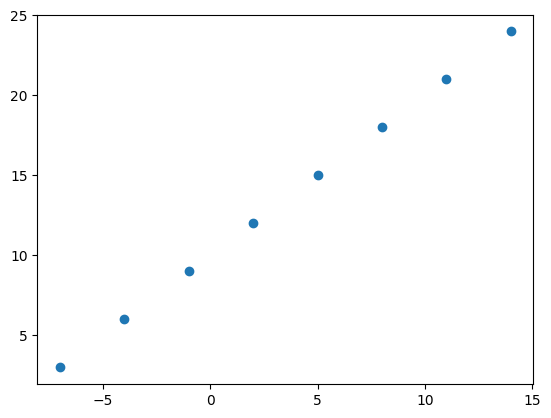

In [3]:
# Plotting the data
plt.scatter(X,y)

## Input and Output Shapes

In [4]:
# Create a Tensor for house info
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])  # Input
house_price = tf.constant([939700])  # Output

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Figuring out input and output shape for X and y?
# NOTE: This doesn't work, the input shape should be (1,) and output shape should be (1,)
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

## Steps in Modeling with TensorFlow

1. Creating a model: define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model: define the loss function (in other words, the function which tellls our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model: letting the model try to find patterns between X and y (features and labels).

In [6]:
# Set random seet
tf.random.set_seed(42)

### Trial-1
Creating a simple model to iterate and improve upon.

In [7]:
# 1. Create a model using sequential api
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)  # This defines the output layer of shape 1
])
model.input_shape, model.output_shape, model.layers

((None, 1), (None, 1), [<keras.src.layers.core.dense.Dense at 0x16498a7c0>])

In [8]:
# 2. Compiling the model
# losses.mae is Mean Absolute Error
# In short, this takes the average of the error between the prediction and the actual value
loss_function = tf.keras.losses.mae

# optimizers.SGD is Stochastic Gradient Descent
# NOTE: Using optimizers.legacy.SGD due to optimizers.SGD being slower on M1 Mac
optimizer = tf.keras.optimizers.legacy.SGD()

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['mae'])

In [9]:
# 3. Fit the model
model.fit(X, y, epochs=5)  # epochs is how many times the model runs through the training data

Epoch 1/5
1/1 [==============================] - 0s 107ms/step - loss: 16.2961 - mae: 16.2961
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 16.0149 - mae: 16.0149
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 15.7336 - mae: 15.7336
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 15.4524 - mae: 15.4524
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 15.1711 - mae: 15.1711


In [10]:
# Testing predictions of the model
model.predict([17.0])  # This is pretty far off, so next steps are to improve the model

1/1 [==============================] - 0s 34ms/step


array([[-6.982657]], dtype=float32)

### Improving the model

We can improve our model by altering the steps we took to create a model.

1. **Creating a Model**: We can add more layers, increase number of neurons in each hidden layer, change the activation function of each layer.
2. **Compiling a Model**: We can change the loss function, use a different optimization function, or the learning rate of the optimization function.
3. **Fitting a Model**: We can fit a model with more epochs (cycle through training data more times) or on more data (give more examples to learn from).

**NOTE**: It is better to start with a smaller model, then impr

### Trial-2
Only difference between Trial 1 and Trial 2 is I will increase the epochs (number of cycles trained through the training data)

In [11]:
# Rebuilding/Improving the Model

# 1. Create a model using sequential api
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)  # This defines the output layer of shape 1
])

# 2. Compiling the model
# losses.mae is Mean Absolute Error
# In short, this takes the average of the error between the prediction and the actual value
loss_function = tf.keras.losses.mae

# optimizers.SGD is Stochastic Gradient Descent
# NOTE: Using optimizers.legacy.SGD due to optimizers.SGD being slower on M1 Mac
optimizer = tf.keras.optimizers.legacy.SGD()

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['mae'])

# 3. Fit the model (training for 100 epochs instead of 5)
model.fit(X, y, epochs=100)  # epochs is how many times the model runs through the training data

Epoch 1/100
1/1 [==============================] - 0s 84ms/step - loss: 18.8877 - mae: 18.8877
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 18.6065 - mae: 18.6065
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 18.3252 - mae: 18.3252
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 18.0440 - mae: 18.0440
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 17.7627 - mae: 17.7627
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 17.4815 - mae: 17.4815
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 17.2002 - mae: 17.2002
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 16.9190 - mae: 16.9190
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 16.6377 - mae: 16.6377
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 16.3565 - mae: 16.3565
Epoch 11/100
1/1 [==============================] - 0s 3ms

1/1 [==============================] - 0s 3ms/step - loss: 6.9000 - mae: 6.9000
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8944 - mae: 6.8944
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8888 - mae: 6.8888
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8831 - mae: 6.8831
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8775 - mae: 6.8775
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8719 - mae: 6.8719
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8663 - mae: 6.8663
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8606 - mae: 6.8606
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8550 - mae: 6.8550
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8494 - mae: 6.8494
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8438 - ma

In [12]:
# Testing predictions of the model
model.predict([17.0])  # This is pretty far off, so next steps are to improve the model

1/1 [==============================] - 0s 21ms/step


array([[29.515503]], dtype=float32)

### Trial-3
Keeping epochs the same as Trial-2, but adding a hidden layer.

In [13]:
# Rebuilding/Improving the Model

# 1. Create a model using sequential api
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the Model
loss_function = tf.keras.losses.mae
optimizer = tf.keras.optimizers.legacy.SGD()

model.compile(loss=loss_function, optimizer=optimizer, metrics=['mae'])

# 3. Fit the Model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 94ms/step - loss: 15.0528 - mae: 15.0528
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.4620 - mae: 14.4620
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8837 - mae: 13.8837
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.3285 - mae: 13.3285
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.7816 - mae: 12.7816
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2334 - mae: 12.2334
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6880 - mae: 11.6880
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 11.1330 - mae: 11.1330
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5697 - mae: 10.5697
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.9933 - mae: 9.9933
Epoch 11/100
1/1 [==============================] - 0s 2ms/s

Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7134 - mae: 3.7134
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7495 - mae: 3.7495
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6864 - mae: 3.6864
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7583 - mae: 3.7583
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6940 - mae: 3.6940
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7315 - mae: 3.7315
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7077 - mae: 3.7077
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7108 - mae: 3.7108
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 3.7185 - mae: 3.7185
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6835 - mae: 3.6835
Epoch 99/100
1/1 [==============================] - 0s 2ms/step - loss

In [14]:
# Testing predictions of the model (Actual value should be 27)
model.predict([17.0])  # Weird, this value prediction is not even close to the value, even though the mae is lower

1/1 [==============================] - 0s 23ms/step


array([[31.133049]], dtype=float32)

### Trial-4
Keeping epochs the same as Trial-2 and hidden layers from Trial-3, but changing the optimizer

In [15]:
# Rebuilding/Improving the Model

# 1. Create a model using sequential api
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the Model
loss_function = tf.keras.losses.mae
optimizer = tf.keras.optimizers.legacy.Adam(lr=0.01)

model.compile(loss=loss_function, optimizer=optimizer, metrics=['mae'])

# 3. Fit the Model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 107ms/step - loss: 13.7666 - mae: 13.7666
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9433 - mae: 12.9433
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.1233 - mae: 12.1233
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2947 - mae: 11.2947
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.4803 - mae: 10.4803
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.8258 - mae: 9.8258
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 9.1434 - mae: 9.1434
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.4274 - mae: 8.4274
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 7.6749 - mae: 7.6749
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8904 - mae: 6.8904
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - l

/Users/brandonkubick/Code/deep-learning-development/env/lib/python3.8/site-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 4ms/step - loss: 4.6588 - mae: 4.6588
Epoch 23/100
1/1 [==============================] - 0s 2ms/step - loss: 4.4758 - mae: 4.4758
Epoch 24/100
1/1 [==============================] - 0s 3ms/step - loss: 4.2433 - mae: 4.2433
Epoch 25/100
1/1 [==============================] - 0s 3ms/step - loss: 3.9697 - mae: 3.9697
Epoch 26/100
1/1 [==============================] - 0s 2ms/step - loss: 3.6997 - mae: 3.6997
Epoch 27/100
1/1 [==============================] - 0s 3ms/step - loss: 3.5707 - mae: 3.5707
Epoch 28/100
1/1 [==============================] - 0s 2ms/step - loss: 3.4419 - mae: 3.4419
Epoch 29/100
1/1 [==============================] - 0s 2ms/step - loss: 3.3096 - mae: 3.3096
Epoch 30/100
1/1 [==============================] - 0s 3ms/step - loss: 3.3367 - mae: 3.3367
Epoch 31/100
1/1 [==============================] - 0s 2ms/step - loss: 3.3674 - mae: 3.3674
Epoch 32/100
1/1 [==============================] - 0s 3ms/step - loss: 3.3646 - ma

In [16]:
# Testing predictions of the model (Actual value should be 27)
model.predict([17.0])

1/1 [==============================] - 0s 24ms/step


array([[27.16185]], dtype=float32)

## Evaluating a Model

In practive, a typical workflow you'll go through consists of the following:

create a model -> fit it -> evaluat it  -> tweak it -> repeat....

**Most Important to Eavluating**
Most important step of eavluating a model is to Visualize. It's a good idea to visualize:
* The data: what data are we working with? What does it look like?
* The model: What does our model look like?
* The training of the model: How does aa model perform while it learns?
* The predictions of the model: How accurate are the predictions?

## Big Data
What is a good way to train a model? Give it a bigger dataset!

In [17]:
# Making a bigger set of data.
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

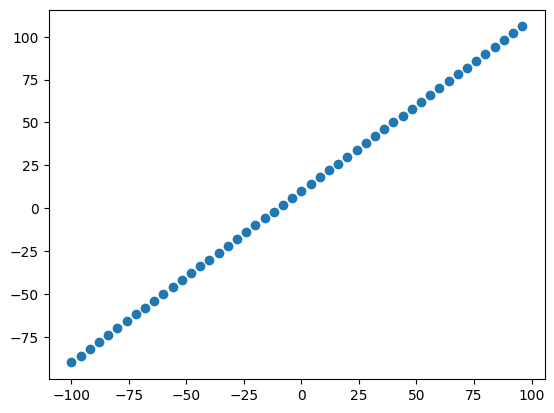

In [18]:
# Visualize the data
plt.scatter(X, y)

### Splitting Data
Need to split my complete data set into a training set and a test set

**NOTE: There are typically 3 sets to split the data with**
1. **Training Set**: Typically 70-80% of the data available used to train the model
2. **Validation Set**: The data the model gets tuned on. Typically 10-15%.
3. **Test Set**: The model gets evaluated on this data to teest what it has learned. Typically 10-15% of data.

In [19]:
# Figuring out the Training and Test Set Sizes
total_units = len(X)
total_units

50

In [20]:
# Get the training set (80%)
# NOTE: Typically, we should shuffle the data before splitting

X_train = X[:int(total_units * 0.8)]
y_train = y[:int(total_units * 0.8)]

X_test = X[int(total_units * 0.8):]
y_test = y[int(total_units * 0.8):]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

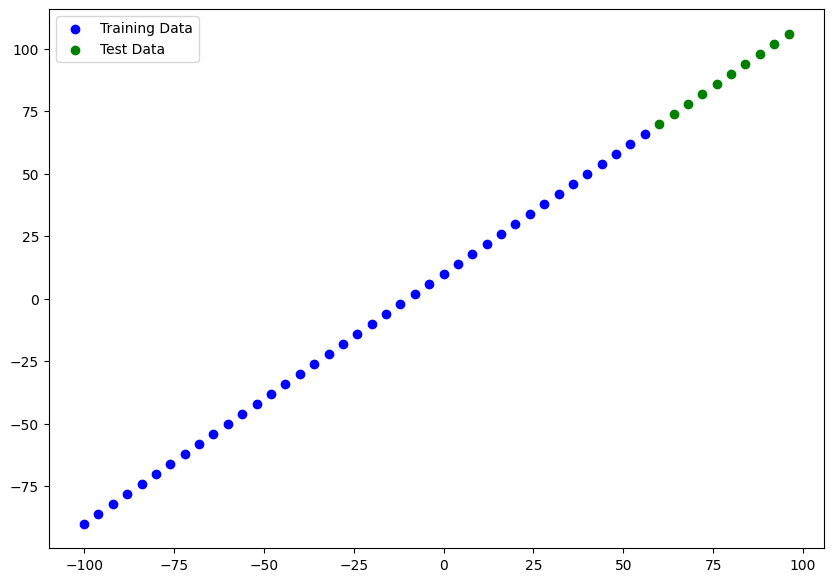

In [21]:
# Visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend()

### Create Model

In [22]:
# 1. Create Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,), name='InputLayer'),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(1, name='OutputLayer'),
])

# 2. Compile Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.legacy.Adam(lr=0.005),
             metrics=['mae'])


# 3. Fit Model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 2ms/step - loss: 35.8364 - mae: 35.8364
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 30.3984 - mae: 30.3984
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 25.2626 - mae: 25.2626
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 20.0900 - mae: 20.0900
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 15.1360 - mae: 15.1360
Epoch 6/10
2/2 [==============================] - 0s 1ms/step - loss: 10.7672 - mae: 10.7672
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 9.4792 - mae: 9.4792
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 10.3753 - mae: 10.3753
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 8.7610 - mae: 8.7610
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 6.1519 - mae: 6.1519


### Visualizing the model

Visualizing the model can be done with a handful of tools.

* Summary: Looking at the summary of the model and what it looks like.
* Diagram: Looking at the diagram of the model.
* Plot: Plotting the predictions of the model

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer-1 (Dense)       (None, 100)               200       
                                                                 
 OutputLayer (Dense)         (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params: the total parameters in the model.
* Trainable params: the parameters (patterns) the model can update as it trains.
* Non-trainable params: the parameters (patterns) that the model does not update as it trains. This occurrs when using an already trained model from transfer learning.

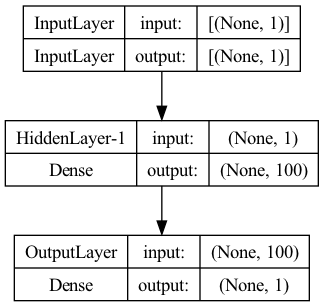

In [24]:
plot_model(model, show_shapes=True, show_layer_names=True)

#### Visualizing the Predictions

Plotting predictions against the actual values can help better visualize the model. This is often in the form of y_test or y_true versus y_pred.

In [25]:
# Make Some predictions
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 21ms/step


(array([[ 73.48752],
        [ 78.34875],
        [ 83.20996],
        [ 88.0712 ],
        [ 92.93242],
        [ 97.79364],
        [102.65488],
        [107.5161 ],
        [112.37733],
        [117.23855]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

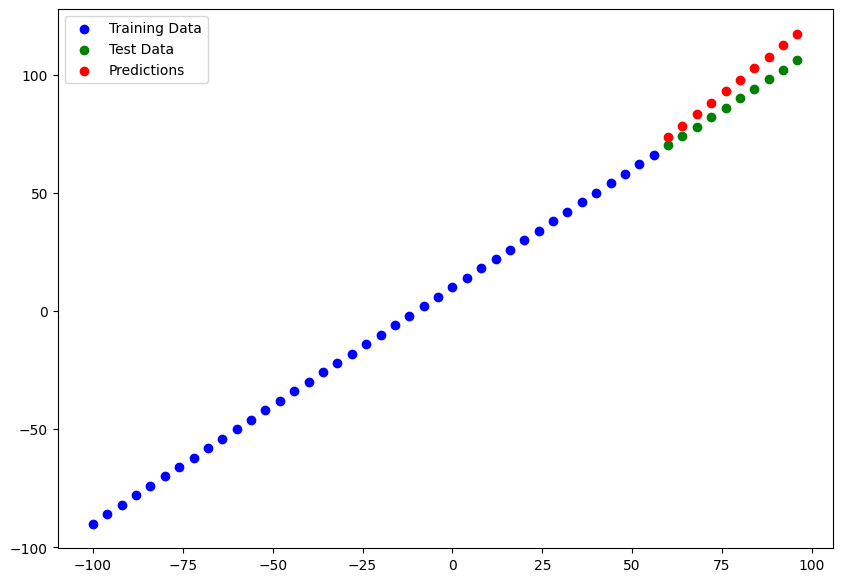

In [26]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data, and compares predictions against actual valus.
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label='Test Data')
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()

plot_predictions()

### Evaluation Metrics

Depending on the problem, there will be different evaluation metrics to evaluate your model's performance.

Common Regression Metrics:
* **Mean Absolute Error**: The average absolute value of the difference between the prediction and the actual value.
* **Mean Square Error**: The average of the square of the difference between the prediction and the actual value.
  - Note: This is useful because the larger the difference, the MSE is drastically larger than just looking at the difference between the prediction and the actual value. TLDR: larger erros are more significant than smaller errors.
* **Huber**: Combination of MSE and MAE. Less sensitive to outliers than MSE, but more sensitive to larger errors than MAE.

In [27]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 60ms/step - loss: 7.3630 - mae: 7.3630


[7.363034248352051, 7.363034248352051]

In [28]:
mae = tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_test), y_pred=tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_true=tf.squeeze(y_test), y_pred=tf.squeeze(y_pred))
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=7.3630333>,
 <tf.Tensor: shape=(), dtype=float32, numpy=60.333366>)

In [29]:
def mae(y_true, pred):
    return tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_true), y_pred=tf.squeeze(pred))

def mse(y_true, pred):
    return tf.metrics.mean_squared_error(y_true=tf.squeeze(y_true), y_pred=tf.squeeze(pred))

### Resetting and Iterating My Model to Optimize It

Going to test out 3 experiments with the same data as before.

1. Trial-1: Simple Model
2. Trial-2: Increase epochs to 100
3. Trial-3: Add a 2nd Hidden Layer with epochs at 100
4. Trial-4: Add a 2nd Hidden Layer with epochs at 500

In [30]:
# Resetting up the data and setup
tf.random.set_seed(42)

X = tf.range(-100, 100, 4)
y = X + 10

In [31]:
# Splitting the Data
num_training_points = int(len(X) * 0.8)

X_train = X[:num_training_points]
y_train = y[:num_training_points]

X_test = X[num_training_points:]
y_test = y[num_training_points:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Trial-1: Simple Model

In [32]:
# 1. Create Model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compile Model
model_1.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr=0.005),
              loss=tf.keras.losses.mae)

# 3. Fit Model
model_1.fit(X_train, y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 3ms/step - loss: 32.5840
Epoch 2/10
2/2 [==============================] - 0s 2ms/step - loss: 29.6106
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 26.6300
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 23.5264
Epoch 5/10
2/2 [==============================] - 0s 1ms/step - loss: 20.4656
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 17.4515
Epoch 7/10
2/2 [==============================] - 0s 1ms/step - loss: 14.2103
Epoch 8/10
2/2 [==============================] - 0s 2ms/step - loss: 10.8491
Epoch 9/10
2/2 [==============================] - 0s 1ms/step - loss: 7.6398
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 5.6722


In [33]:
# Testing the Model
predictions_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 20ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=16.455912>,
 <tf.Tensor: shape=(), dtype=float32, numpy=285.36923>)

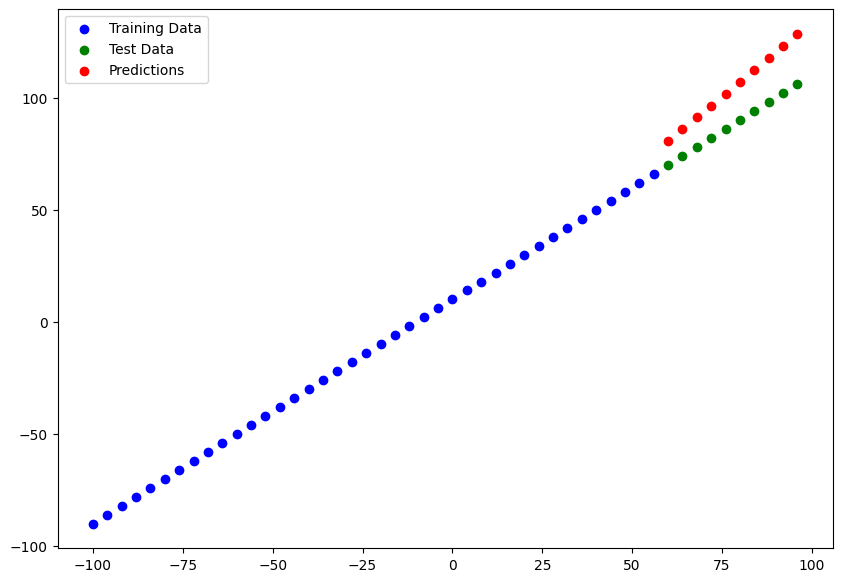

In [34]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_1)

mae_1 = mae(y_test, predictions_1 )
mse_1 = mse(y_test, predictions_1 )
mae_1, mse_1

#### Trial-2: Epochs = 100

In [35]:
# 1. Create Model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compile Model
model_2.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr=0.005),
              loss=tf.keras.losses.mae)

# 3. Fit Model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 34.2659
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 30.5822
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 27.0310
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 23.3548
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 19.7859
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 16.3435
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 12.8662
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3227
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 6.1824
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 4.1716
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 5.6955
Epoch 12/100
2/2 [==============================] - 0s 1ms/step - loss: 7.2969
Epoch 13/100
2/2 [==============================] - 0s

In [36]:
# Testing the Model
predictions_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 18ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=2.5509286>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.782846>)

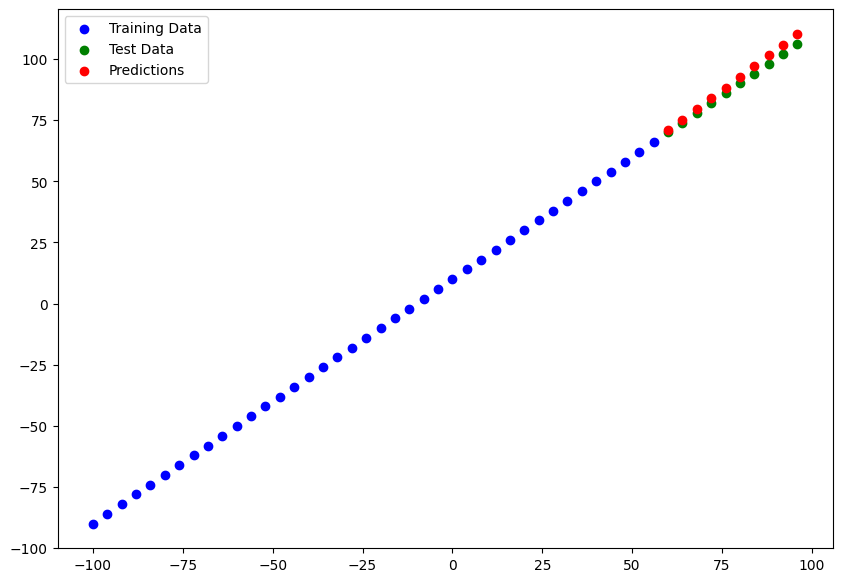

In [37]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_2)

mae_2 = mae(y_test, predictions_2 )
mse_2 = mse(y_test, predictions_2 )
mae_2, mse_2

#### Trial-3: Epochs-100, Hidden Layers=2

In [38]:
# 1. Create Model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-2'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compile Model
model_3.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr=0.005),
              loss=tf.keras.losses.mae)

# 3. Fit Model
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 47.1400
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 35.1007
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 25.4195
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 16.9355
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6279
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 6.9385
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 5.8374
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 5.4264
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 6.0654
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 5.7043
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 5.1899
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 4.4513
Epoch 13/100
2/2 [==============================] - 0s 2m

In [39]:
# Testing the Model
predictions_3 = model_3.predict(X_test)

1/1 [==============================] - 0s 20ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=2.2980552>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.288313>)

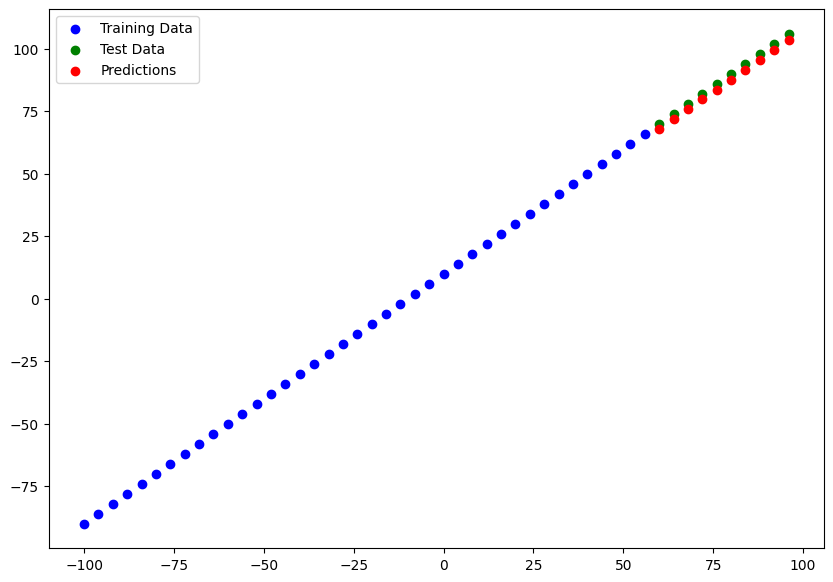

In [40]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_3)

mae_3 = mae(y_test, predictions_3 )
mse_3 = mse(y_test, predictions_3 )
mae_3, mse_3

#### Trial 4: Epochs=500, Hidden Layers=2

In [41]:
# 1. Create Model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,), name='InputLayer'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-1'),
    tf.keras.layers.Dense(50, activation=tf.keras.activations.relu, name='HiddenLayer-2'),
    tf.keras.layers.Dense(1, name='OutputLayer')
])

# 2. Compile Model
model_4.compile(optimizer=tf.keras.optimizers.legacy.Adam(lr=0.005),
              loss=tf.keras.losses.mae)

# 3. Fit Model
model_4.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 40.0704
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 31.0019
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 23.6539
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 16.2926
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 9.2806
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 5.3684
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 7.4388
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 7.2373
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 7.3046
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 7.1280
Epoch 11/500
2/2 [==============================] - 0s 2ms/step - loss: 5.9405
Epoch 12/500
2/2 [==============================] - 0s 2ms/step - loss: 4.7631
Epoch 13/500
2/2 [==============================] - 0s 2m

2/2 [==============================] - 0s 1ms/step - loss: 2.0108
Epoch 105/500
2/2 [==============================] - 0s 1ms/step - loss: 2.5277
Epoch 106/500
2/2 [==============================] - 0s 2ms/step - loss: 3.5552
Epoch 107/500
2/2 [==============================] - 0s 1ms/step - loss: 1.2055
Epoch 108/500
2/2 [==============================] - 0s 2ms/step - loss: 2.6878
Epoch 109/500
2/2 [==============================] - 0s 1ms/step - loss: 2.0184
Epoch 110/500
2/2 [==============================] - 0s 1ms/step - loss: 1.0231
Epoch 111/500
2/2 [==============================] - 0s 2ms/step - loss: 1.0133
Epoch 112/500
2/2 [==============================] - 0s 1ms/step - loss: 1.1635
Epoch 113/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6772
Epoch 114/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6971
Epoch 115/500
2/2 [==============================] - 0s 2ms/step - loss: 0.5374
Epoch 116/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 0.3527
Epoch 207/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4256
Epoch 208/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3014
Epoch 209/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3471
Epoch 210/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9029
Epoch 211/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6255
Epoch 212/500
2/2 [==============================] - 0s 1ms/step - loss: 1.5182
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 2.0636
Epoch 214/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6709
Epoch 215/500
2/2 [==============================] - 0s 1ms/step - loss: 1.5754
Epoch 216/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8697
Epoch 217/500
2/2 [==============================] - 0s 2ms/step - loss: 1.1213
Epoch 218/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 2ms/step - loss: 0.7236
Epoch 309/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6684
Epoch 310/500
2/2 [==============================] - 0s 1ms/step - loss: 0.8644
Epoch 311/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6316
Epoch 312/500
2/2 [==============================] - 0s 2ms/step - loss: 0.3645
Epoch 313/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9818
Epoch 314/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4416
Epoch 315/500
2/2 [==============================] - 0s 1ms/step - loss: 0.9540
Epoch 316/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6581
Epoch 317/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4262
Epoch 318/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2054
Epoch 319/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2705
Epoch 320/500
2/2 [==============================] - 0

2/2 [==============================] - 0s 1ms/step - loss: 0.6681
Epoch 411/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3069
Epoch 412/500
2/2 [==============================] - 0s 2ms/step - loss: 0.4326
Epoch 413/500
2/2 [==============================] - 0s 1ms/step - loss: 0.4608
Epoch 414/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3666
Epoch 415/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3855
Epoch 416/500
2/2 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 417/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6129
Epoch 418/500
2/2 [==============================] - 0s 1ms/step - loss: 0.2169
Epoch 419/500
2/2 [==============================] - 0s 1ms/step - loss: 0.3979
Epoch 420/500
2/2 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 421/500
2/2 [==============================] - 0s 1ms/step - loss: 0.6279
Epoch 422/500
2/2 [==============================] - 0

In [42]:
# Testing the Model
predictions_4 = model_4.predict(X_test)

1/1 [==============================] - 0s 21ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=0.40810165>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.16961648>)

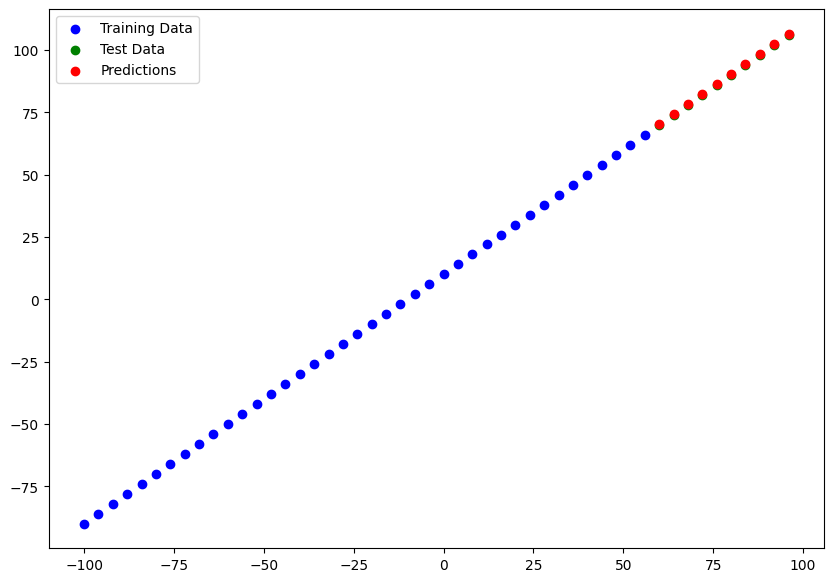

In [43]:
# Evaluating Model
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=predictions_4 )

mae_4 = mae(y_test, predictions_4 )
mse_4 = mse(y_test, predictions_4 )
mae_4, mse_4

#### Comparing Each Simulation

In [44]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()],
                 ['model_4', mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,16.455912,285.369232
1,model_2,2.550929,7.782846
2,model_3,2.298055,5.288313
3,model_4,0.408102,0.169616


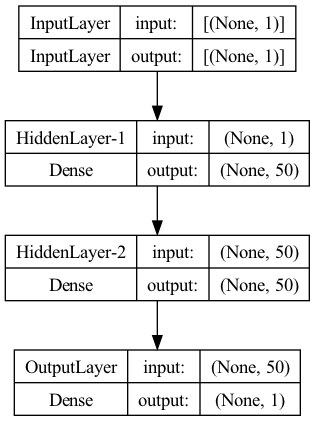

In [45]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

## Tracking Experiments

A good habit for machine learning is to track experiments and their corresponding results.

Useful tools to help track experiments:
* TensorBoard: Component of the TensorFlow library to help track modeling experiments.
* Weights & Biases: tool used for tracking experiments (Should def look this one up!)

## Saving Our Models

Saving out models allows us to use them outside of the place they were trained. 

* TensorFlow Docs: https://www.tensorflow.org/tutorials/keras/save_and_load
* Saving model can be done by `model.save("savedirpath")` or `model.save("h5filepath.h5")`
* Loading model can be done by `tf.keras.models.load_model("savedirpath")` or `tf.keras.models.load_model("h5filepath.h5")`

# Testing Models w/ TensorFlow Using Medical Insurance Data

I want to get some experience seeing different functionality TensorFlow offers, so going to use a general dataset to do so.

Going to look at the medical cost dataset from Kaggle.
* https://www.kaggle.com/datasets/mirichoi0218/insurance?r

## Imports

In [46]:
import os
import random
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import plot_model

from src import utils

## Step-0: Get & Analyze the Data

Need to look at the data to see what needs to be done to build out a model.

In [47]:
# Reading the dataset from the raw csv file on the public github file
csv_dataset_url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
insurance = pd.read_csv(csv_dataset_url)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
# Looking at the unique values in the age column
np.unique(insurance['age'].to_numpy())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [49]:
# Looking at the unique values in the children column
np.unique(insurance['children'].to_numpy())

array([0, 1, 2, 3, 4, 5])

## Step-1: Pre-Process Data

### Normalize & Encode Data

In [50]:
# Creating the Feature Scaler and One Hot Encoder
column_transformer = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),  # normalize all value in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']))

## Step-2: Split Test & Train Data

In [51]:
# Separating out the X and y
y_column_name = 'charges'
X_df = insurance.drop(y_column_name, axis=1)
y_df = insurance[y_column_name]

In [52]:
# Splitting the data to test and train
# NOTE: We do not need to convert these to tensors, Pandas is built on top of numpy which is handled directly
# with the model

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
column_transformer.fit(X_train)
X_train_normal = column_transformer.transform(X_train)
X_test_normal = column_transformer.transform(X_test)

### Viewing Normalized Data

In [53]:
X_train_normal[0].shape, y_train[0].shape

((11,), ())

## Step-3: Create, Compile, Fit, & Evaluate Models

### Model-1: Using a Simple Model 
1. Hidden Layer of 100
2. SGD - learning rate = 0.01
3. 25 epochs

In [54]:
# Setting seed to compare results
tf.random.set_seed(42)

# 1. Create Model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
learning_rate = 0.01
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate),
                metrics=['mae'])

# 3. Fit Model
history_1 = model_1.fit(X_train_normal, y_train, epochs=25, verbose=0)

In [55]:
# 4. Evaluate Model
evaluate_1 = model_1.evaluate(X_test_normal, y_test)
y_pred_1 = model_1.predict(X_test_normal)

9/9 [==============================] - 0s 419us/step


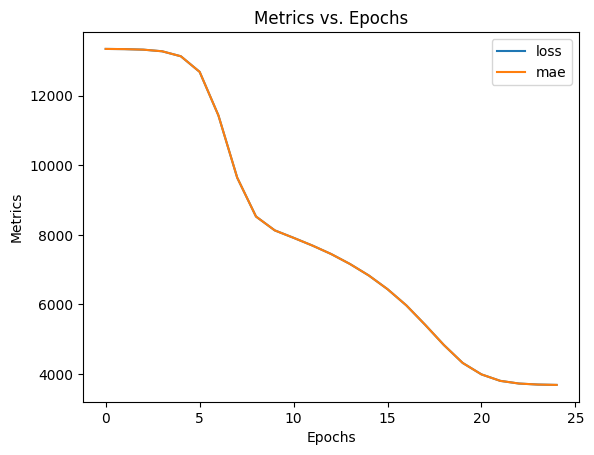

In [56]:
utils.plot.plot_history(history_1)

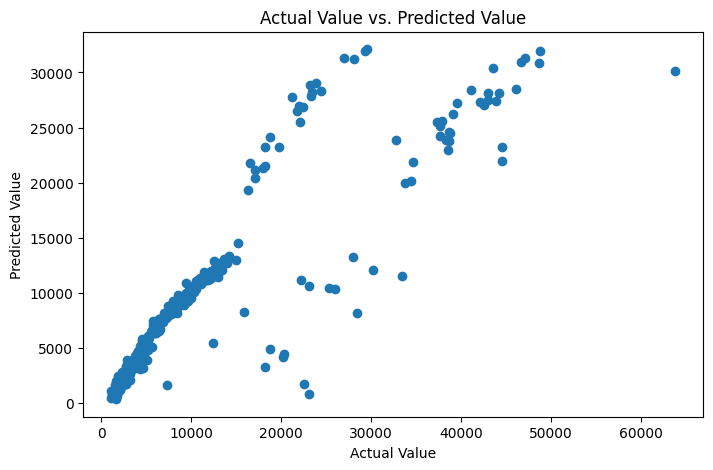

In [57]:
utils.plot.plot_true_versus_predicted(y_test, y_pred_1, figsize=(8, 5))

### Model-2: Increasing Epochs
1. Hidden Layer of 100
2. SGD - learning rate = 0.01
3. 75 epochs

In [58]:
# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
learning_rate = 0.01
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=learning_rate),
                metrics=['mae'])

# 3. Fit Model
history_2 = model_2.fit(X_train_normal, y_train, epochs=75, verbose=0)

In [59]:
# 4. Evaluate Model
evaluate2 = model_2.evaluate(X_test_normal, y_test)
y_pred_2 = model_2.predict(X_test_normal)

9/9 [==============================] - 0s 416us/step


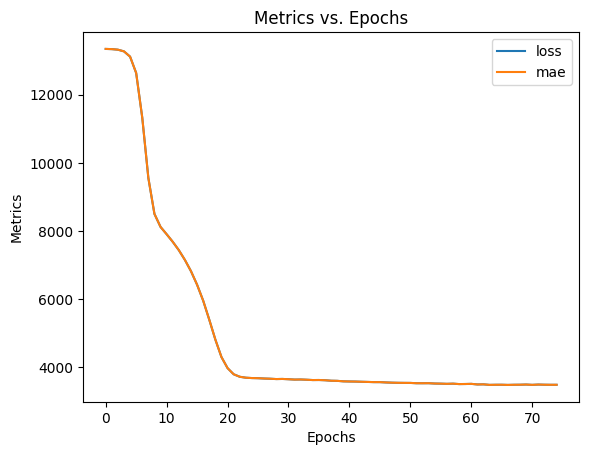

In [60]:
utils.plot.plot_history(history_2)

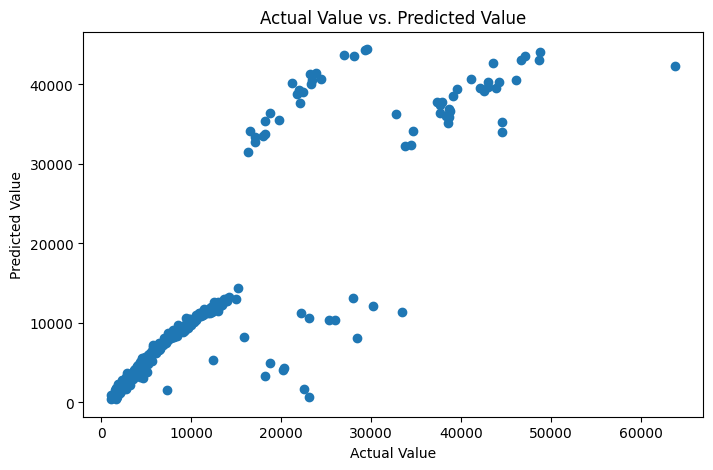

In [61]:
utils.plot.plot_true_versus_predicted(y_test, y_pred_2, figsize=(8, 5))

#### Findings

The epochs steadied out the loss right around 25 epochs, so increasing the epochs only made it slightly more accurate.

### Model-3: 
1. Hidden Layer of 100
2. Adam - learning_rate=0.01
3. 75 epochs

In [62]:
# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
learning_rate = 0.01
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate),
                metrics=['mae'])

# 3. Fit Model
history_3 = model_3.fit(X_train_normal, y_train, epochs=75, verbose=0)

In [63]:
# 4. Evaluate Model
evaluate3 = model_3.evaluate(X_test_normal, y_test)
y_pred_3 = model_3.predict(X_test_normal)

9/9 [==============================] - 0s 471us/step


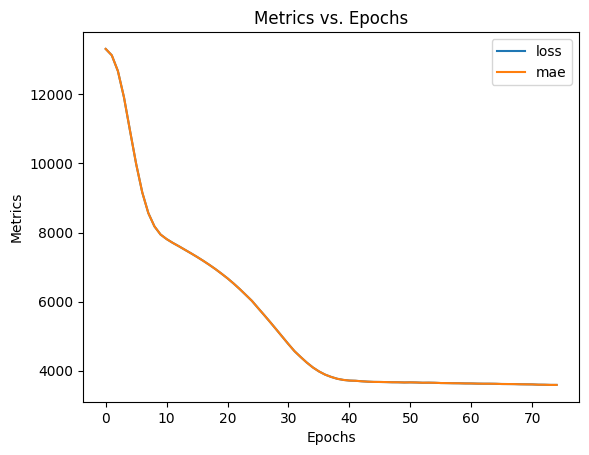

In [64]:
utils.plot.plot_history(history_3)

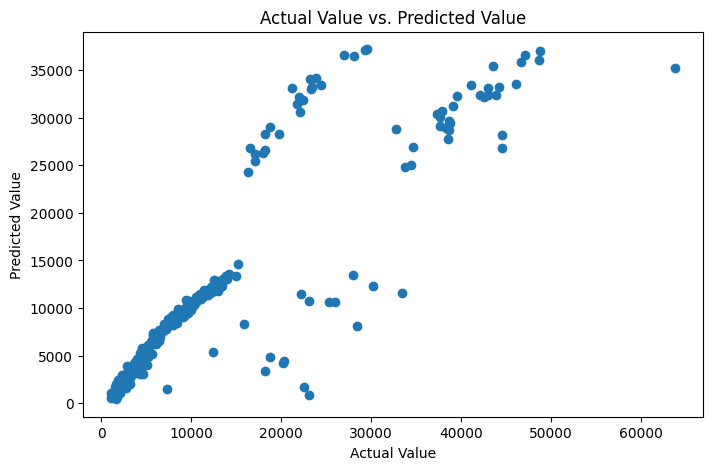

In [65]:
utils.plot.plot_true_versus_predicted(y_test, y_pred_3, figsize=(8, 5))

## Looking at Learning Rates

Now that I have a handful of Models to compare against, I want to start looking at different ways of updating the learning rate.

In [66]:
# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
initial_learning_rate = 0.001
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=initial_learning_rate),
                metrics=['mae'])

lr_scheduler_callback = utils.learning_rate.exponential_decay_callback(initial_learning_rate, decay_factor=2)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler_callback)


# 3. Fit Model
epochs = 90
history_4 = model_4.fit(X_train_normal, y_train, epochs=epochs, callbacks=[lr_scheduler])

Epoch 1/90
34/34 [==============================] - 0s 603us/step - loss: 13344.6514 - mae: 13344.6514 - lr: 0.0010
Epoch 2/90
34/34 [==============================] - 0s 638us/step - loss: 13341.3584 - mae: 13341.3584 - lr: 0.0011
Epoch 3/90
34/34 [==============================] - 0s 554us/step - loss: 13335.5039 - mae: 13335.5039 - lr: 0.0011
Epoch 4/90
34/34 [==============================] - 0s 518us/step - loss: 13325.3584 - mae: 13325.3584 - lr: 0.0012
Epoch 5/90
34/34 [==============================] - 0s 480us/step - loss: 13309.3086 - mae: 13309.3086 - lr: 0.0013
Epoch 6/90
34/34 [==============================] - 0s 489us/step - loss: 13285.7754 - mae: 13285.7754 - lr: 0.0014
Epoch 7/90
34/34 [==============================] - 0s 495us/step - loss: 13253.1338 - mae: 13253.1338 - lr: 0.0015
Epoch 8/90
34/34 [==============================] - 0s 502us/step - loss: 13209.4561 - mae: 13209.4561 - lr: 0.0016
Epoch 9/90
34/34 [==============================] - 0s 504us/step - loss

Epoch 72/90
34/34 [==============================] - 0s 474us/step - loss: 3512.9595 - mae: 3512.9595 - lr: 0.1372
Epoch 73/90
34/34 [==============================] - 0s 466us/step - loss: 3529.1003 - mae: 3529.1003 - lr: 0.1470
Epoch 74/90
34/34 [==============================] - 0s 470us/step - loss: 3521.4126 - mae: 3521.4126 - lr: 0.1576
Epoch 75/90
34/34 [==============================] - 0s 484us/step - loss: 3524.6951 - mae: 3524.6951 - lr: 0.1689
Epoch 76/90
34/34 [==============================] - 0s 447us/step - loss: 3536.9792 - mae: 3536.9792 - lr: 0.1810
Epoch 77/90
34/34 [==============================] - 0s 461us/step - loss: 3555.1067 - mae: 3555.1067 - lr: 0.1940
Epoch 78/90
34/34 [==============================] - 0s 471us/step - loss: 3548.3630 - mae: 3548.3630 - lr: 0.2079
Epoch 79/90
34/34 [==============================] - 0s 463us/step - loss: 3544.0776 - mae: 3544.0776 - lr: 0.2229
Epoch 80/90
34/34 [==============================] - 0s 469us/step - loss: 3571.

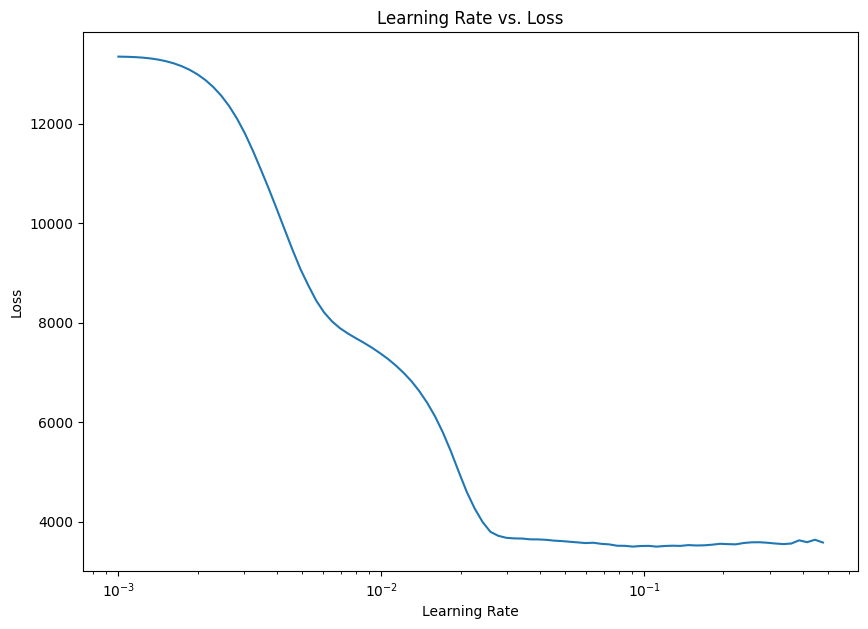

In [67]:
learning_rates = [lr_scheduler_callback(epoch) for epoch in range(epochs)]
utils.plot.plot_learning_rate_versus_loss(learning_rates, history_4.history['loss'])

#### Findings

From the above graph, it looks like the optimal learning rate is between .05-.08.

### Working with Callbacks

1. EarlyStopping
2. LambdaCallback

#### Testing out the EarlyStopping Callback

In [68]:
# Trying out the EarlyStopping Epoch Callback

# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
initial_learning_rate = 0.06
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=initial_learning_rate),
                metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=20,
    start_from_epoch=10,
    restore_best_weights=True)

# 3. Fit Model
epochs = 200
history_5 = model_5.fit(X_train_normal, y_train, epochs=epochs, callbacks=[early_stopping])

Epoch 1/200
34/34 [==============================] - 0s 605us/step - loss: 12636.0830 - mae: 12636.0830
Epoch 2/200
34/34 [==============================] - 0s 586us/step - loss: 8853.5430 - mae: 8853.5430
Epoch 3/200
34/34 [==============================] - 0s 536us/step - loss: 7633.1387 - mae: 7633.1387
Epoch 4/200
34/34 [==============================] - 0s 473us/step - loss: 6994.3667 - mae: 6994.3667
Epoch 5/200
34/34 [==============================] - 0s 466us/step - loss: 6164.4497 - mae: 6164.4497
Epoch 6/200
34/34 [==============================] - 0s 497us/step - loss: 5067.6270 - mae: 5067.6270
Epoch 7/200
34/34 [==============================] - 0s 512us/step - loss: 4102.4185 - mae: 4102.4185
Epoch 8/200
34/34 [==============================] - 0s 480us/step - loss: 3718.0200 - mae: 3718.0200
Epoch 9/200
34/34 [==============================] - 0s 477us/step - loss: 3667.5581 - mae: 3667.5581
Epoch 10/200
34/34 [==============================] - 0s 494us/step - loss: 3663

##### Findings

The lowest mae epoch was epoch 45. With the patience set to 20 for the callback, the last epoch was 65, at which point no epoch value was lower than the lowest mae at epoch 45, at which point it finished training.

#### Testing Lambda Callback

In [69]:
# Trying out the LambdaCallback Epoch Callback

# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model
initial_learning_rate = 0.06
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=initial_learning_rate),
                metrics=['mae'])

lambda_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_begin=lambda epoch, logs: print(f'Epoch Start: {epoch}'),
    on_epoch_end=lambda epoch, logs: print(f'Epoch End: {epoch}', logs))

# 3. Fit Model
epochs = 10
history_6 = model_6.fit(X_train_normal, y_train, epochs=epochs, callbacks=[lambda_callback], verbose=0)

Epoch Start: 0
Epoch End: 0 {'loss': 12627.7294921875, 'mae': 12627.7294921875}
Epoch Start: 1
Epoch End: 1 {'loss': 8843.798828125, 'mae': 8843.798828125}
Epoch Start: 2
Epoch End: 2 {'loss': 7631.1455078125, 'mae': 7631.1455078125}
Epoch Start: 3
Epoch End: 3 {'loss': 6990.96044921875, 'mae': 6990.96044921875}
Epoch Start: 4
Epoch End: 4 {'loss': 6160.6904296875, 'mae': 6160.6904296875}
Epoch Start: 5
Epoch End: 5 {'loss': 5065.705078125, 'mae': 5065.705078125}
Epoch Start: 6
Epoch End: 6 {'loss': 4104.69384765625, 'mae': 4104.69384765625}
Epoch Start: 7
Epoch End: 7 {'loss': 3719.44921875, 'mae': 3719.44921875}
Epoch Start: 8
Epoch End: 8 {'loss': 3663.743896484375, 'mae': 3663.743896484375}
Epoch Start: 9
Epoch End: 9 {'loss': 3663.83544921875, 'mae': 3663.83544921875}


### Working with Optimizer Callbacks

1. ExponentialDecay Learning Rate Scheduler

In [70]:
# Trying out Optimizer ExponentialDecay Learning Rate Scheduler Callbacks

# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model w/ ExponentialDecay
initial_learning_rate = 0.05
decay_steps = 1000000
decay_rate = 0.05
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate)

model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule),
                metrics=['mae'])

# 3. Fit Model
epochs = 40
history_7 = model_7.fit(X_train_normal, y_train, epochs=epochs, verbose=0)

In [71]:
# 4. Evaluate Model
evaluate7 = model_7.evaluate(X_test_normal, y_test)
y_pred_7 = model_7.predict(X_test_normal)

9/9 [==============================] - 0s 452us/step


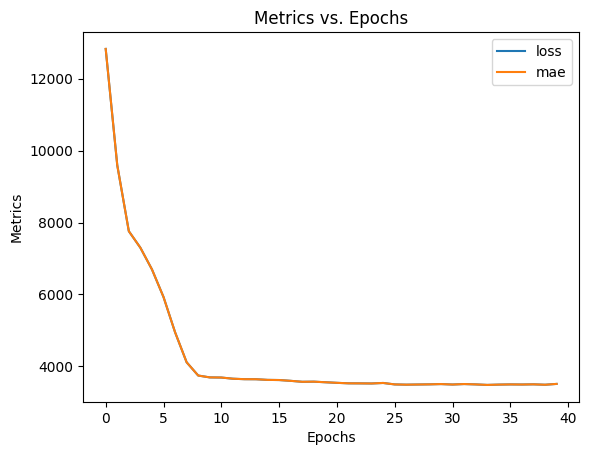

In [72]:
utils.plot.plot_history(history_7)

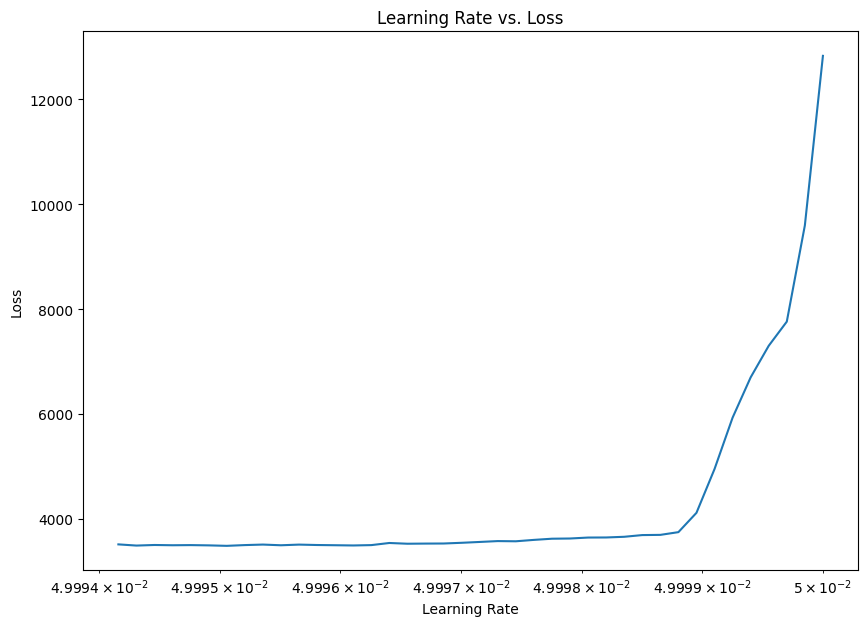

In [73]:
lr_scheduler_callback_7 = utils.learning_rate.exponential_decay_callback(
    initial_learning_rate, decay_factor=decay_rate, decay_step=decay_steps)
learning_rates = [lr_scheduler_callback_7(epoch) for epoch in range(epochs)]
utils.plot.plot_learning_rate_versus_loss(learning_rates, history_7.history['loss'])

### Quickly Testing Different Activations

In [74]:
# Trying out Optimizer ExponentialDecay Learning Rate Scheduler Callbacks

# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model w/ ExponentialDecay
initial_learning_rate = 0.05
decay_steps = 1000000
decay_rate = 0.05
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate)

model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.001),
                metrics=['mae'])

# 3. Fit Model
epochs = 40
history_8 = model_8.fit(
    X_train_normal,
    y_train,
    epochs=epochs,
    verbose=0)

In [75]:
# 4. Evaluate Model
evaluate8 = model_8.evaluate(X_test_normal, y_test)
y_pred_8 = model_8.predict(X_test_normal)

9/9 [==============================] - 0s 487us/step


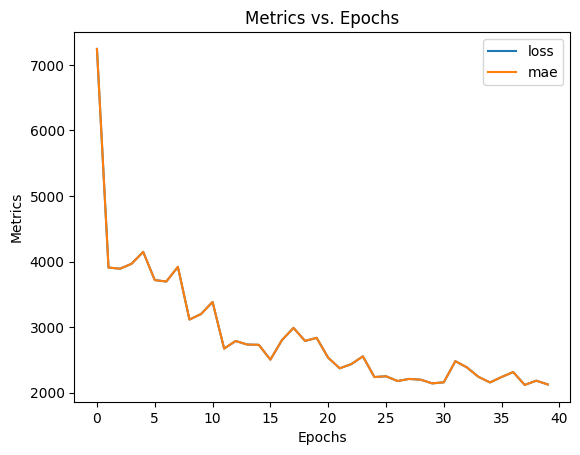

In [76]:
utils.plot.plot_history(history_8)

In [77]:
# Trying out Optimizer CosineRestart Learning Rate Scheduler Callbacks

# Setting seed
tf.random.set_seed(42)

# 1. Create Model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model w/ ExponentialDecay
initial_learning_rate = 0.05
decay_steps = 1450
decay_rate = 0.05
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_learning_rate, decay_steps=decay_steps)

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.001),
                metrics=['mae'])

# 3. Fit Model
epochs = 40
history_9 = model_9.fit(
    X_train_normal,
    y_train,
    epochs=epochs,
    verbose=0)

In [78]:
# 4. Evaluate Model
evaluate9 = model_9.evaluate(X_test_normal, y_test)
y_pred_9 = model_9.predict(X_test_normal)
evaluate9

9/9 [==============================] - 0s 489us/step


[1399.0885009765625, 1399.0885009765625]

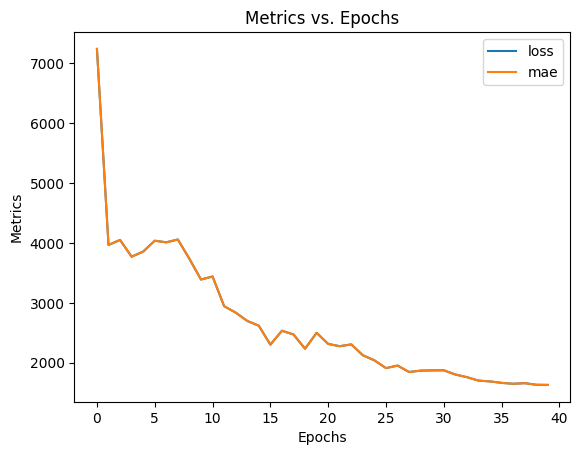

In [79]:
utils.plot.plot_history(history_9)

### Figuring Out Good Step Size for CosineDecay

In [80]:
# Trying out Optimizer CosineDecay Learning Rate Scheduler Callbacks
epochs = 40
initial_learning_rate = 0.05

decay_steps_values = np.arange(100, 10100, 100)
losses_per_step_test = []

for decay_steps in decay_steps_values: 
    # Setting seed
    tf.random.set_seed(42)

    # 1. Create Model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(11,)),
        tf.keras.layers.Dense(200),
        tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)
    ])

    # 2. Compile Model w/ ExponentialDecay
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=initial_learning_rate, decay_steps=decay_steps)

    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.001),
                  metrics=['mae'])

    # 3. Fit Model
    model.fit(
        X_train_normal,
        y_train,
        epochs=epochs,
        verbose=0)

    # 4. Evaluate Model
    evaluate = model.evaluate(X_test_normal, y_test)
    losses_per_step_test.append(evaluate[0])  # loss is first value in array

9/9 [==============================] - 0s 701us/step - loss: 3124.5225 - mae: 3124.5225


9/9 [==============================] - 0s 587us/step - loss: 2976.2708 - mae: 2976.2708


9/9 [==============================] - 0s 623us/step - loss: 2927.1594 - mae: 2927.1594


9/9 [==============================] - 0s 595us/step - loss: 2751.6836 - mae: 2751.6836


9/9 [==============================] - 0s 606us/step - loss: 2621.6931 - mae: 2621.6931


9/9 [==============================] - 0s 611us/step - loss: 1680.4065 - mae: 1680.4065


9/9 [==============================] - 0s 628us/step - loss: 1820.2754 - mae: 1820.2754


9/9 [==============================] - 0s 567us/step - loss: 1776.7452 - mae: 1776.7452


9/9 [==============================] - 0s 602us/step - loss: 1613.8805 - mae: 1613.8805


9/9 [==============================] - 0s 592us/step - loss: 1490.4646 - mae: 1490.4646


9/9 [==============================] - 0s 553us/step - loss: 1455.6646 - mae: 1455.6646


9/9 [==============================] - 0s 568us/step - loss: 1456.8198 - mae: 1456.8198


9/9 [==============================] - 0s 599us/step - loss: 1438.9226 - mae: 1438.9226


9/9 [==============================] - 0s 596us/step - loss: 1454.9800 - mae: 1454.9800


9/9 [==============================] - 0s 570us/step - loss: 1374.6564 - mae: 1374.6564


9/9 [==============================] - 0s 592us/step - loss: 1375.6331 - mae: 1375.6331


9/9 [==============================] - 0s 581us/step - loss: 1378.2617 - mae: 1378.2617


9/9 [==============================] - 0s 617us/step - loss: 1472.2281 - mae: 1472.2281


9/9 [==============================] - 0s 572us/step - loss: 1421.9619 - mae: 1421.9619


9/9 [==============================] - 0s 587us/step - loss: 1502.6315 - mae: 1502.6315


9/9 [==============================] - 0s 616us/step - loss: 1503.1172 - mae: 1503.1172


9/9 [==============================] - 0s 602us/step - loss: 1518.0804 - mae: 1518.0804


9/9 [==============================] - 0s 623us/step - loss: 1647.8774 - mae: 1647.8774


9/9 [==============================] - 0s 643us/step - loss: 1451.4972 - mae: 1451.4972


9/9 [==============================] - 0s 594us/step - loss: 1614.7002 - mae: 1614.7002


9/9 [==============================] - 0s 566us/step - loss: 1776.8490 - mae: 1776.8490


9/9 [==============================] - 0s 607us/step - loss: 1529.9495 - mae: 1529.9495


9/9 [==============================] - 0s 606us/step - loss: 1534.5020 - mae: 1534.5020


9/9 [==============================] - 0s 548us/step - loss: 1688.5522 - mae: 1688.5522


9/9 [==============================] - 0s 635us/step - loss: 1717.2664 - mae: 1717.2664


9/9 [==============================] - 0s 656us/step - loss: 1616.8102 - mae: 1616.8102


9/9 [==============================] - 0s 603us/step - loss: 1649.4534 - mae: 1649.4534


9/9 [==============================] - 0s 585us/step - loss: 1743.3016 - mae: 1743.3016


9/9 [==============================] - 0s 555us/step - loss: 2169.0740 - mae: 2169.0740


9/9 [==============================] - 0s 575us/step - loss: 2103.9944 - mae: 2103.9944


9/9 [==============================] - 0s 599us/step - loss: 1923.4395 - mae: 1923.4395


9/9 [==============================] - 0s 607us/step - loss: 1710.7463 - mae: 1710.7463


9/9 [==============================] - 0s 593us/step - loss: 1908.4323 - mae: 1908.4323


9/9 [==============================] - 0s 606us/step - loss: 1589.3407 - mae: 1589.3407


9/9 [==============================] - 0s 609us/step - loss: 1936.2529 - mae: 1936.2529


9/9 [==============================] - 0s 671us/step - loss: 2040.1385 - mae: 2040.1385


9/9 [==============================] - 0s 619us/step - loss: 2115.6243 - mae: 2115.6243


9/9 [==============================] - 0s 581us/step - loss: 1833.4438 - mae: 1833.4438


9/9 [==============================] - 0s 627us/step - loss: 1858.7056 - mae: 1858.7056


9/9 [==============================] - 0s 621us/step - loss: 2338.9370 - mae: 2338.9370


9/9 [==============================] - 0s 610us/step - loss: 1771.3516 - mae: 1771.3516


9/9 [==============================] - 0s 603us/step - loss: 2031.5487 - mae: 2031.5487


9/9 [==============================] - 0s 582us/step - loss: 1646.2413 - mae: 1646.2413


9/9 [==============================] - 0s 606us/step - loss: 1750.8580 - mae: 1750.8580


9/9 [==============================] - 0s 614us/step - loss: 1731.0627 - mae: 1731.0627


9/9 [==============================] - 0s 653us/step - loss: 1842.3572 - mae: 1842.3572


9/9 [==============================] - 0s 584us/step - loss: 1767.0138 - mae: 1767.0138


9/9 [==============================] - 0s 612us/step - loss: 1637.5453 - mae: 1637.5453


9/9 [==============================] - 0s 673us/step - loss: 2150.5698 - mae: 2150.5698


9/9 [==============================] - 0s 577us/step - loss: 1904.5654 - mae: 1904.5654


9/9 [==============================] - 0s 582us/step - loss: 1752.9172 - mae: 1752.9172


9/9 [==============================] - 0s 621us/step - loss: 1849.6294 - mae: 1849.6294


9/9 [==============================] - 0s 615us/step - loss: 1936.3298 - mae: 1936.3298


9/9 [==============================] - 0s 604us/step - loss: 1856.2997 - mae: 1856.2997


9/9 [==============================] - 0s 581us/step - loss: 1696.7964 - mae: 1696.7964


9/9 [==============================] - 0s 600us/step - loss: 1757.4313 - mae: 1757.4313


9/9 [==============================] - 0s 621us/step - loss: 1831.3455 - mae: 1831.3455


9/9 [==============================] - 0s 570us/step - loss: 1687.0284 - mae: 1687.0284


9/9 [==============================] - 0s 618us/step - loss: 3209.0969 - mae: 3209.0969


9/9 [==============================] - 0s 590us/step - loss: 1764.5052 - mae: 1764.5052


9/9 [==============================] - 0s 612us/step - loss: 1888.0999 - mae: 1888.0999


9/9 [==============================] - 0s 743us/step - loss: 1889.6897 - mae: 1889.6897


9/9 [==============================] - 0s 581us/step - loss: 1911.1216 - mae: 1911.1216


9/9 [==============================] - 0s 594us/step - loss: 2526.4529 - mae: 2526.4529


9/9 [==============================] - 0s 611us/step - loss: 1702.9180 - mae: 1702.9180


9/9 [==============================] - 0s 591us/step - loss: 1686.2869 - mae: 1686.2869


9/9 [==============================] - 0s 539us/step - loss: 2370.6365 - mae: 2370.6365


9/9 [==============================] - 0s 599us/step - loss: 2581.5703 - mae: 2581.5703


9/9 [==============================] - 0s 593us/step - loss: 1909.6597 - mae: 1909.6597


9/9 [==============================] - 0s 625us/step - loss: 1938.6154 - mae: 1938.6154


9/9 [==============================] - 0s 612us/step - loss: 1818.7563 - mae: 1818.7563


9/9 [==============================] - 0s 575us/step - loss: 1683.7106 - mae: 1683.7106


9/9 [==============================] - 0s 593us/step - loss: 1745.9260 - mae: 1745.9260


9/9 [==============================] - 0s 606us/step - loss: 2407.0996 - mae: 2407.0996


9/9 [==============================] - 0s 587us/step - loss: 2077.3315 - mae: 2077.3315


9/9 [==============================] - 0s 598us/step - loss: 1813.5941 - mae: 1813.5941


9/9 [==============================] - 0s 621us/step - loss: 1824.1973 - mae: 1824.1973


9/9 [==============================] - 0s 596us/step - loss: 2009.9664 - mae: 2009.9664


9/9 [==============================] - 0s 589us/step - loss: 2640.5122 - mae: 2640.5122


9/9 [==============================] - 0s 613us/step - loss: 1813.8848 - mae: 1813.8848


9/9 [==============================] - 0s 621us/step - loss: 1837.9210 - mae: 1837.9210


9/9 [==============================] - 0s 634us/step - loss: 1875.7500 - mae: 1875.7500


9/9 [==============================] - 0s 608us/step - loss: 2018.7070 - mae: 2018.7070


9/9 [==============================] - 0s 602us/step - loss: 2121.0100 - mae: 2121.0100


9/9 [==============================] - 0s 644us/step - loss: 1838.1906 - mae: 1838.1906


9/9 [==============================] - 0s 561us/step - loss: 1846.9188 - mae: 1846.9188


9/9 [==============================] - 0s 608us/step - loss: 1904.1908 - mae: 1904.1908


9/9 [==============================] - 0s 621us/step - loss: 1834.3278 - mae: 1834.3278


9/9 [==============================] - 0s 575us/step - loss: 1849.7379 - mae: 1849.7380


9/9 [==============================] - 0s 601us/step - loss: 1969.2164 - mae: 1969.2164


9/9 [==============================] - 0s 602us/step - loss: 1896.1879 - mae: 1896.1879


9/9 [==============================] - 0s 623us/step - loss: 2956.4929 - mae: 2956.4929


9/9 [==============================] - 0s 603us/step - loss: 1970.7820 - mae: 1970.7820


9/9 [==============================] - 0s 578us/step - loss: 1975.1155 - mae: 1975.1155


9/9 [==============================] - 0s 611us/step - loss: 1914.7314 - mae: 1914.7314


In [81]:
losses_per_epoch = np.array(losses_per_step_test)
losses_per_epoch.argmin() 

14

In [83]:
losses_per_epoch[14], decay_steps_values[14]

(1374.6563720703125, 1500)

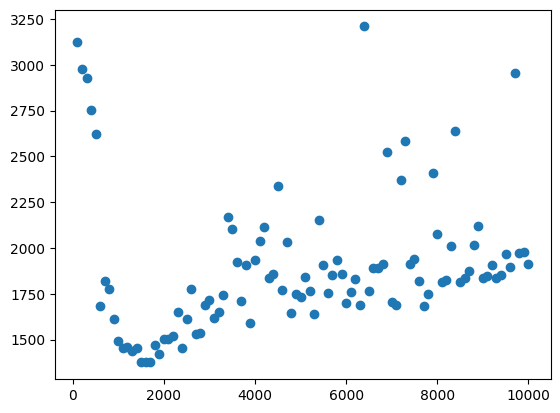

In [84]:
plt.figure()
plt.scatter(decay_steps_values, losses_per_epoch)
plt.show()

#### Findings

A step size of 1500 for the cosine decay function seemed to work best.

### Testing Batch Sizes

In [85]:
epochs = 40

# Cosine Decay Parameters
initial_learning_rate = 0.05
decay_steps = 1500

batch_size_tests = np.arange(5, 105, 5)
batch_size_loss_values = []
for batch_size in batch_size_tests: 
    # Setting seed
    tf.random.set_seed(42)

    # 1. Create Model
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(11,)),
        tf.keras.layers.Dense(200),
        tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)
    ])

    # 2. Compile Model w/ ExponentialDecay
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=initial_learning_rate, decay_steps=decay_steps)

    model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.001),
                  metrics=['mae'])

    # 3. Fit Model
    model.fit(
        X_train_normal,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0)

    # 4. Evaluate Model
    evaluate = model.evaluate(X_test_normal, y_test)
    batch_size_loss_values.append(evaluate[0])  # loss is first value in array

9/9 [==============================] - 0s 610us/step - loss: 1954.3818 - mae: 1954.3818


9/9 [==============================] - 0s 637us/step - loss: 2141.9248 - mae: 2141.9248


9/9 [==============================] - 0s 627us/step - loss: 1492.1841 - mae: 1492.1841


9/9 [==============================] - 0s 549us/step - loss: 1613.3033 - mae: 1613.3033


9/9 [==============================] - 0s 650us/step - loss: 1437.1523 - mae: 1437.1523


9/9 [==============================] - 0s 540us/step - loss: 1389.4463 - mae: 1389.4463


9/9 [==============================] - 0s 637us/step - loss: 1457.2997 - mae: 1457.2997


9/9 [==============================] - 0s 606us/step - loss: 1570.7267 - mae: 1570.7267


9/9 [==============================] - 0s 598us/step - loss: 1551.5892 - mae: 1551.5892


9/9 [==============================] - 0s 563us/step - loss: 1743.5865 - mae: 1743.5865


9/9 [==============================] - 0s 610us/step - loss: 1514.8308 - mae: 1514.8308


9/9 [==============================] - 0s 568us/step - loss: 1537.8787 - mae: 1537.8787


9/9 [==============================] - 0s 661us/step - loss: 1860.1145 - mae: 1860.1145


9/9 [==============================] - 0s 646us/step - loss: 1607.6212 - mae: 1607.6212


9/9 [==============================] - 0s 651us/step - loss: 2078.7756 - mae: 2078.7756


9/9 [==============================] - 0s 659us/step - loss: 1939.1915 - mae: 1939.1915


9/9 [==============================] - 0s 627us/step - loss: 2260.8821 - mae: 2260.8821


9/9 [==============================] - 0s 626us/step - loss: 1679.2638 - mae: 1679.2638


9/9 [==============================] - 0s 619us/step - loss: 2356.6887 - mae: 2356.6887


9/9 [==============================] - 0s 638us/step - loss: 1627.5348 - mae: 1627.5348


In [86]:
losses_per_epoch_batch_size = np.array(batch_size_loss_values)
losses_per_epoch_batch_size.argmin()

5

In [87]:
losses_per_epoch_batch_size[5], batch_size_tests[5]

(1389.4462890625, 30)

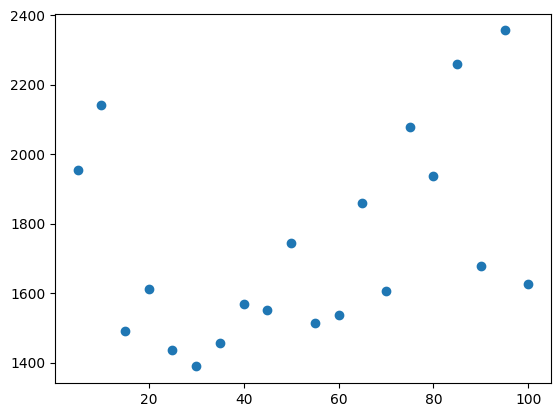

In [88]:
plt.figure()
plt.scatter(batch_size_tests, losses_per_epoch_batch_size)
plt.show()

#### Findings

Looks like a batch size of 30 was the optimal value

In [101]:
# Setting seed
tf.random.set_seed(42)

# Cosine Decay Parameters
initial_learning_rate = 0.05
decay_steps = 1500

# Setting Batch size and epochs
batch_size = 30
epochs = 40


# 1. Create Model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model w/ ExponentialDecay
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_learning_rate, decay_steps=decay_steps)

model_10.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.001),
              metrics=['mae'])

# 3. Fit Model
model_10.fit(
    X_train_normal,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=0)

# 4. Evaluate Model
evaluate = model_10.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 673us/step - loss: 1397.7352 - mae: 1397.7352


In [104]:
y_pred_10 = model_best.predict(X_test_normal)

9/9 [==============================] - 0s 676us/step


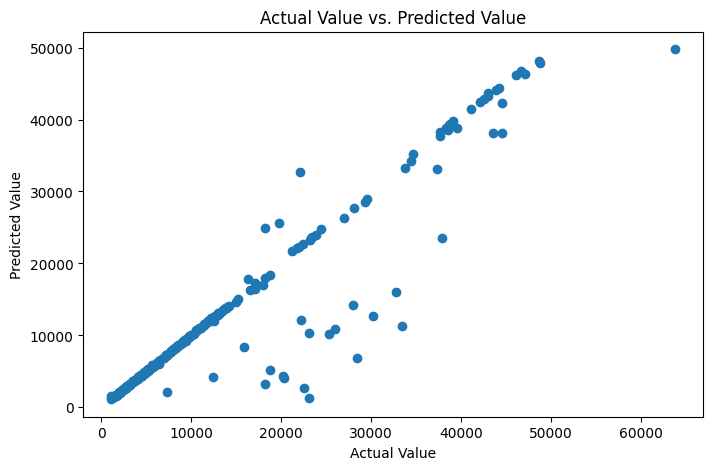

In [105]:
utils.plot.plot_true_versus_predicted(y_test, y_pred_10, figsize=(8, 5))

### Testing Different Loss Functions

In [118]:
# Setting seed
tf.random.set_seed(42)

# Cosine Decay Parameters
initial_learning_rate = 0.05
decay_steps = 1500

# Setting Batch size and epochs
batch_size = 30
epochs = 40


# 1. Create Model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(11,)),
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dense(200, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile Model w/ ExponentialDecay
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_learning_rate, decay_steps=decay_steps)

model_11.compile(loss=tf.keras.losses.huber,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, weight_decay=0.001),
              metrics=['mae', 'mse'])

# 3. Fit Model
history_11 = model_11.fit(
    X_train_normal,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=0)

# 4. Evaluate Model
evaluate = model_11.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 657us/step - loss: 1387.6049 - mae: 1388.1036 - mse: 18945722.0000


#### Findings

Tested MSE, MAE, and Huber. MAE and Huber outperformed MSE significantly, and Huber slightly outperformed MAE.